# 분산분석
* 두 개 이상의 다수 집단 간 평균을 비교하는 통계 분석 방법(F검정 통계량 이용)
    * 그룹 평균 간 차이를 그룹 내 변동에 비교하고 살펴보는 통계분석 방법
    * 집단 내 분산(차이)보다 다른 집단과 분산(차이)이 더 크다면 유의하다는 개념
* 종속변수는 연속형, 독립변수는 범주형 변수여야함
1. 일원배치 (1:1)
2. 이원배치 (2:1)
3. 다원배치 (n:1)
4. 다변량 분산분석(MANOVA) (1:n)

In [15]:
import scipy.stats as stats
from scipy.stats import shapiro, levene # 정규성, 등분산성
from scipy.stats import kruskal # 정규성 불만족 시
import pingouin as pg # 등분산성 불만족 시
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd # 튜키의 HSD
from statsmodels.stats.multicomp import MultiComparison

### 일원배치
```stats.f_oneway(k1, k2, k3)```

| 귀무가설: K개의 집단 간 모평균은 같다
* 반응값(종속)에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증 방법
    * 모집단의 수에 제한이 없고 각 표본의 수가 같지 않아도 된다.

    **F검정통계량**
* 평균차가 아니라 분산의 비율값
* 분산분석에서 집단 내 분산보다 집단 간 분산이 크다면 F값은 커지고 귀무가설을 기각할 확률이 높아짐

In [3]:
import pandas as pd
# 종별 꽃받침 데이터 (Width(종속): target(독립))
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# 집단 나누기(setosa, versicolor, virginica)
targets = iris.target.unique()
setosa = iris.loc[iris.target == targets[0]]['sepal width']
versicolor = iris.loc[iris.target == targets[1]]['sepal width']
virginica = iris.loc[iris.target == targets[2]]['sepal width']

In [17]:
# 집단 별 정규성, 등분산성 검정
print(shapiro(setosa))
print(shapiro(versicolor))
print(shapiro(virginica))
print(levene(setosa, versicolor, virginica))

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089857697486877)
LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)


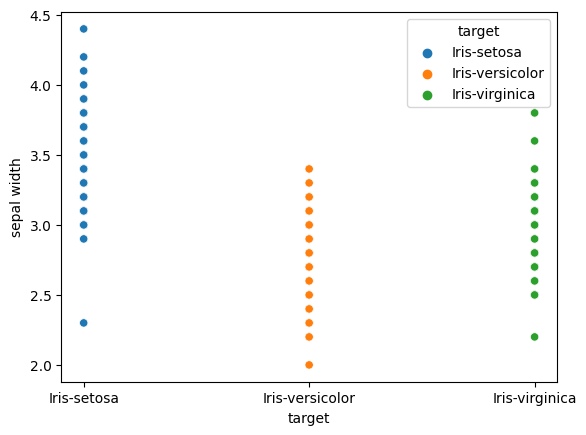

In [13]:
# target 시각화(분포 확인) - 시각적으로는 평균차가 존재하는 것으로 보임
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='target', y = 'sepal width', data=iris, hue='target');

1. 정규성, 등분산성 만족

In [18]:
# 귀무가설 기각 => 집단 간 평균이 다르다
result = stats.f_oneway(setosa, versicolor, virginica)
print(result)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)


2. 정규성 불만족

In [19]:
result = kruskal(setosa, versicolor, virginica)
result

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

3. 정규성 만족, 등분산성 불만족

In [20]:
result = pg.welch_anova(data=iris, dv='sepal width', between='target') # dv: 종속변수, between: 독립변수
result

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


#### 사후검정
* 분산분석의 결과 귀무가설이 기각될 경우, 어떤 집단에 대해 평균차가 존재하는지 알아보기 위해 실시하는 분석
* 모든 집단 수준에 대하여 두 집단씩 짝을 지어 다중비교 수행
1. 던칸의 MRT
2. vltusml LSD
3. 튜키의 HSD

    ...

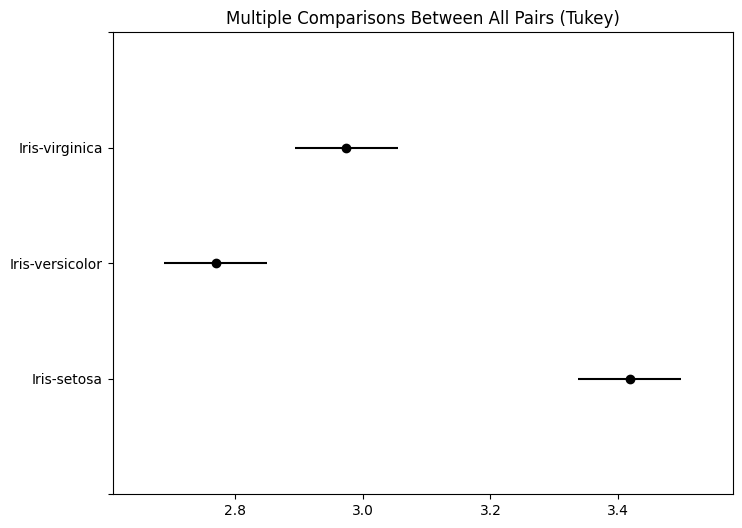

In [23]:
# 튜키의 HSD(Honestly Siginificant Difference: 진정으로 유의미한 차이)
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous(figsize=(8,6))

* 그래프 해석
    
    집단 간 수치의 폭이 겹칠수록 유의미한 차이가 없는 것으로 판단

    해당 그래프는 모든 집단이 겹치는 구간이 없으므로 평균에 유의미한 차이가 있다고 할 수 있다.


In [22]:
tuekeyhsd.summary()
# 그룹 1,2의 평균차, p-value

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


### 이원배치 

귀무가설 3개!

```stats.anova.anova_lm```

| 귀무가설1: a,b 변수의 교호작용(interaction)이 없다

| 귀무가설2: a변수에 따른 종속변수의 값에는 차이가 없다

| 귀무가설3: b변수에 따른 종속변수의 값에는 차이가 없다
* 하나의 반응값에 대한 두 개의 범주형 변수의 영향을 알아보기 우히ㅐ 사용되는 검증 방법

    ex) 성별과 학년에 따른 시험점수의 차이에 대해 분석
* 두 독립변수 사이에 상관관계가 있는지 살펴보는 교호작용에 대한 검증이 반드시 진행되어야 함

In [24]:
# 차종 데이터
mtcars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
